In [1]:
import os
from json import load, dump

In [2]:
os.listdir()

['municipalities_and_districts.json',
 'octave-workspace',
 'Untitled1.ipynb',
 'sairaanhoitopiirit.json',
 'Untitled.ipynb',
 'Untitled2.ipynb',
 'sairaanhoitopiirit_geo.json',
 'municipalities.json',
 'shp_jäsenkunnat.xls',
 '.ipynb_checkpoints']

In [3]:
with open('sairaanhoitopiirit.json') as shp_file, open('municipalities.json') as m_file:
    shp = load(shp_file)
    munic = load(m_file)    

In [4]:
def get_municipality_geo(name):
    for i in munic:
        if i['properties']['Name'].lower() == name.lower():
            return i['geometry']['type'], i['geometry']['coordinates']
    return []

In [5]:
def get_shp(municipality):
    found = next(filter(lambda x: x['kunta'] == municipality, shp), None)
    if found:
        return found['shp']

In [6]:
for m in munic['features']:
    municipality_name = m['properties']['Name']
    m['properties']['healthCareDistrict'] = get_shp(municipality_name)

In [64]:
with open('municipalities.json', 'w') as f:
    dump(munic, f)

In [65]:
districts = {i['properties']['Name']: i['properties']['healthCareDistrict'] for i in munic['features']}

In [9]:
with open('municipalities_and_districts.json', 'w') as f:
    dump(districts, f)

In [73]:
districts['Koski Tl'] = 'Varsinais-Suomi'
districts['Valtimo'] = 'Pohjois-Karjala'
districts['Pedersören kunta'] = 'Vaasa'
ahvenanmaa = """Geta
Vårdö
Lemland
Kumlinge
Maarianhamina
Föglö
Kökar
Finström
Sund
Saltvik
Hammarland
Lumparland
Jomala
Brändö
Sottunga
Eckerö""".split()
for i in ahvenanmaa:
    districts[i] = 'Ahvenanmaa'

In [11]:
districtnames = set(districts.values())

In [13]:
districtnames.add('Ahvenanmaa')

In [14]:
geo = {
  "type": "FeatureCollection",
  "crs": {
    "type": "name",
    "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" }
  },
  "features": []
}

In [15]:
for i in districtnames:
    feat = {'type': 'Feature', 'properties': {
            'Name': i,
            'timestamp': None,
            'begin': None,
            'end': None,
            'altitudeMode': None,
            'tessellate': -1,
            'extrude': 0,
            'visibility': -1,
            'drawOrder': None,
            'icon': None,
            'snippet': ''},
         'geometry': {
             'type': 'MultiPolygon',
             'coordinates': []}}
    geo['features'].append(feat)

In [17]:
with open('../src/sairaanhoitopiirit_geo.json', 'w') as f:
    dump(geo, f)

In [18]:
# import necessary packages to work with spatial data in Python
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap

In [19]:
df = gpd.read_file('../src/sairaanhoitopiirit_geo.json')

In [58]:
df = gpd.read_file('municipalities.json')

In [74]:
df['district'] = df['Name'].map(lambda x: districts.get(x))

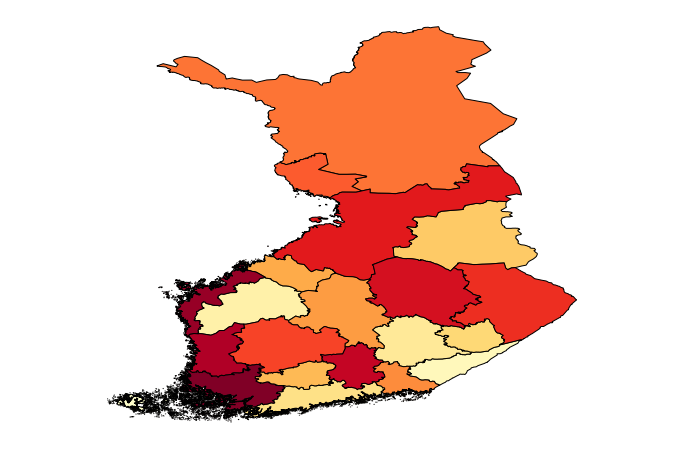

In [76]:
# create the plot
fig, ax = plt.subplots(figsize = (12,8))

df.dissolve(by='district').plot(edgecolor = "black",
                 scheme='quantiles', cmap='YlOrRd', ax=ax, 
                 legend = True)

# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

In [77]:
df

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,snippet,healthCareDistrict,geometry,district
0,Nousiainen,"<div class=""googft-info-window"">\n<b>name:</b>...",None,None,None,None,-1,0,-1,None,None,,Varsinais-Suomi,"POLYGON ((22.21005 60.59568, 22.21112 60.60216...",Varsinais-Suomi
1,Oripää,"<div class=""googft-info-window"">\n<b>name:</b>...",None,None,None,None,-1,0,-1,None,None,,Varsinais-Suomi,"POLYGON ((22.60238 60.92689, 22.61909 60.91401...",Varsinais-Suomi
2,Espoo,"<div class=""googft-info-window"">\n<b>name:</b>...",None,None,None,None,-1,0,-1,None,None,,HUS,"MULTIPOLYGON (((24.83140 60.25406, 24.84191 60...",HUS
3,Tuusula,"<div class=""googft-info-window"">\n<b>name:</b>...",None,None,None,None,-1,0,-1,None,None,,HUS,"POLYGON ((25.15077 60.51673, 25.14175 60.50598...",HUS
4,Muonio,"<div class=""googft-info-window"">\n<b>name:</b>...",None,None,None,None,-1,0,-1,None,None,,Lappi,"POLYGON ((23.54049 67.46104, 23.53932 67.46102...",Lappi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,Heinola,"<div class=""googft-info-window"">\n<b>name:</b>...",None,None,None,None,-1,0,-1,None,None,,Päijät-Häme,"POLYGON ((26.23445 61.13000, 26.16662 61.13830...",Päijät-Häme
307,Kristiinankaupunki,"<div class=""googft-info-window"">\n<b>name:</b>...",None,None,None,None,-1,0,-1,None,None,,Vaasa,"MULTIPOLYGON (((21.64785 62.01958, 21.52401 62...",Vaasa
308,Alajärvi,"<div class=""googft-info-window"">\n<b>name:</b>...",None,None,None,None,-1,0,-1,None,None,,Etelä-Pohjanmaa,"POLYGON ((24.30094 62.98835, 24.25858 62.98575...",Etelä-Pohjanmaa
309,Lapua,"<div class=""googft-info-window"">\n<b>name:</b>...",None,None,None,None,-1,0,-1,None,None,,Etelä-Pohjanmaa,"POLYGON ((23.27892 62.77471, 23.23131 62.78261...",Etelä-Pohjanmaa


In [189]:
df.dissolve(by='district').to_file('../src/sairaanhoitopiirit_geo.json', driver="GeoJSON")

In [27]:
df

,Name,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,snippet,geometry,district
0,Satakunta,None,None,None,None,-1,0,-1,None,None,,"MULTIPOLYGON (((22.70154 60.98694, 22.61470 60...",None
1,HUS,None,None,None,None,-1,0,-1,None,None,,"MULTIPOLYGON (((24.83140 60.25406, 24.84191 60...",None
2,Lappi,None,None,None,None,-1,0,-1,None,None,,"MULTIPOLYGON (((23.54049 67.46104, 23.53932 67...",None
3,Varsinais-Suomi,None,None,None,None,-1,0,-1,None,None,,"MULTIPOLYGON (((22.21005 60.59568, 22.21112 60...",None
4,Etelä-Pohjanmaa,None,None,None,None,-1,0,-1,None,None,,"MULTIPOLYGON (((23.86202 63.27758, 23.86031 63...",None
5,Länsi-Pohja,None,None,None,None,-1,0,-1,None,None,,"MULTIPOLYGON (((24.74741 65.69504, 24.68537 65...",None
6,Pohjois-Savo,None,None,None,None,-1,0,-1,None,None,,"MULTIPOLYGON (((26.82881 63.66682, 26.86551 63...",None
7,Keski-Pohjanmaa,None,None,None,None,-1,0,-1,None,None,,"MULTIPOLYGON (((23.74614 63.97373, 23.75996 63...",None
8,Pirkanmaa,None,None,None,None,-1,0,-1,None,None,,"MULTIPOLYGON (((24.73091 62.02319, 24.87791 62...",None
9,Etelä-Karjala,None,None,None,None,-1,0,-1,None,None,,"MULTIPOLYGON (((28.77665 61.07926, 28.71384 61...",None


In [79]:
def get_largest_polygon(multipolygon):
    return max(multipolygon, key=lambda x: x.area)

In [81]:
from collections.abc import Iterable

In [95]:
df2 = df.dissolve(by='district').copy()

In [96]:
df2['largestPolygon'] = df2['geometry'].map(lambda x: x if not isinstance(x, Iterable) else get_largest_polygon(x))

In [97]:
df2['geometry'] = df2['largestPolygon']

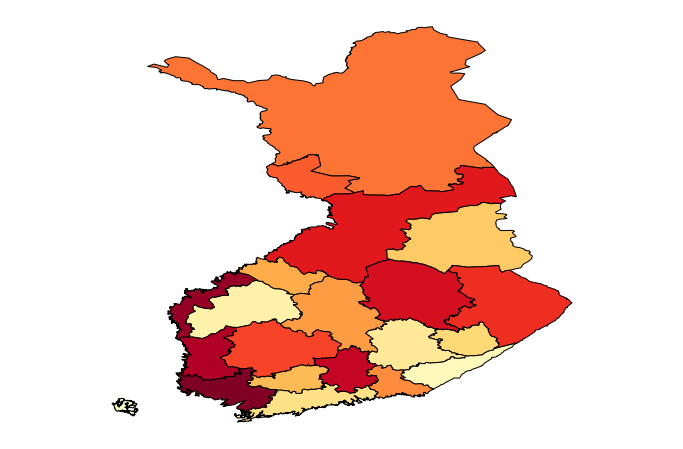

In [99]:
# create the plot

fig, ax = plt.subplots(figsize = (12,8))
df2.plot(edgecolor = "black",
                 scheme='quantiles', cmap='YlOrRd', ax=ax, 
                 legend = True)

# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

In [104]:
df2[['geometry']].to_file("districts_geo.json", driver="GeoJSON")